<a href="https://colab.research.google.com/github/sys7498/2022F-Ajou-ML/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!cd /drive/MyDrive/ColabNotebooks


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: line 0: cd: /drive/MyDrive/ColabNotebooks: No such file or directory


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('drive/MyDrive/ColabNotebooks/airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

0.59


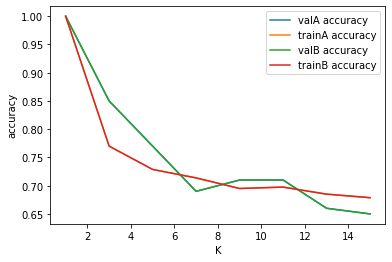

In [8]:
### 문제 1 ###
KNN = [1, 3, 5, 7, 9, 11, 13, 15]
trainA_acc = []
valA_acc = []
trainB_acc = []
valB_acc = []
for k in KNN:
  modelA = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
  modelB = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
  modelA.fit(X_train, y_train)
  modelB.fit(X_train, y_train)
  trainA_acc.append(metrics.accuracy_score(y_train, modelA.predict(X_train)))
  trainB_acc.append(metrics.accuracy_score(y_train, modelA.predict(X_train)))
  
  modelA = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
  modelB = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
  modelA.fit(X_val, y_val)
  modelB.fit(X_val, y_val)
  valA_acc.append(metrics.accuracy_score(y_val, modelA.predict(X_val)))
  valB_acc.append(metrics.accuracy_score(y_val, modelA.predict(X_val)))
  
plt.figure()
plt.plot(KNN, valA_acc, label='valA accuracy')
plt.plot(KNN, trainA_acc, label='trainA accuracy')
plt.plot(KNN, valB_acc, label='valB accuracy')
plt.plot(KNN, trainB_acc, label='trainB accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.legend()

modelA = KNeighborsClassifier(n_neighbors=3, p=1, metric='minkowski')
modelA.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, modelA.predict(X_test)))

### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터: 거리 = 맨하탄, 거리k = 3
- 설명: X축은 k값, Y축은 정확도, 주황색은 맨하탄 거리일때 KNN알고리즘, 파란색은 유클라디안 거리일때 KNN알고리즘입니다. K=3일때 맨하탄 거리인 KNN알고리즘의 정확도가 제일 높은 것을 알 수 있습니다. 그러므로 최적의 하이퍼파라미터는 맨하탄거리, k = 3이라고 결정하였습니다.

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [9]:
from sklearn.ensemble import RandomForestClassifier

0.91


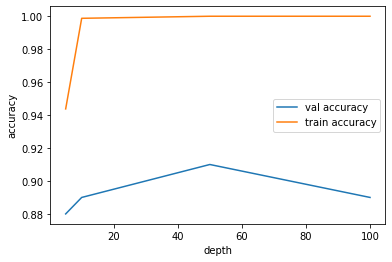

In [10]:
### 문제 2 ###
K = [5, 10, 50, 100]
trainRF = []
valRF = []
for k in K:
  modelRFA = RandomForestClassifier(max_depth=k)
  modelRFA.fit(X_train, y_train)
  trainRF.append(metrics.accuracy_score(y_train, modelRFA.predict(X_train)))
  valRF.append(metrics.accuracy_score(y_val, modelRFA.predict(X_val)))
  
plt.figure()
plt.plot(K, valRF, label='val accuracy')
plt.plot(K, trainRF, label='train accuracy')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend()

modelRFA = RandomForestClassifier(max_depth=50)
modelRFA.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, modelRFA.predict(X_test)))

### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터: max_depth = 50
- 설명: train 정확도는 10일때부터 1에 가까운 값을 계속 내고있지만, validation accuracy는 50일때 거의 최고치를 달성하고, 그 이후 다시 떨어지고있는 것을 확인 할 수 있습니다. 또한, 너무 깊이 들어가게 되면 overfit하기 때문에 50 정도가 제일적당한 값이라고 생각했습니다.

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

best C number =  1
test accuracy =  0.866


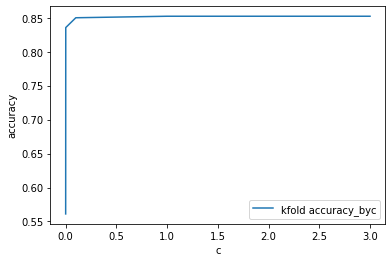

In [11]:
### 문제 3-1 ###
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tX = pd.concat([X_train, X_val])
tY = pd.concat([y_train, y_val])
kfold = KFold(n_splits=5)
kfold_acc = [[],[],[],[],[], []]
kfold_acc_byC = []
kfold_acc_test = [[],[],[],[],[],[]]
kfold_acc_test_byC = []
CA = [0.0001, 0.001, 0.1, 1,2, 3]
cnumber = 0

for c in CA:
  for trainIdx, valIdx in kfold.split(tX, tY):
    trainx, valx = tX.iloc[trainIdx], tX.iloc[valIdx]
    trainy, valy = tY.iloc[trainIdx], tY.iloc[valIdx]
    X_train_scaled = scaler.fit_transform(trainx)
    X_val_scaled = scaler.fit_transform(valx)
    X_test_scaled = scaler.fit_transform(X_test)
    modelKSVM = SVC(C= c, kernel = 'linear')
    modelKSVM.fit(X_train_scaled, trainy)
    kfold_acc[cnumber].append(metrics.accuracy_score(valy, modelKSVM.predict(X_val_scaled)))
    kfold_acc_test[cnumber].append(metrics.accuracy_score(y_test, modelKSVM.predict(X_test_scaled)))
  kfold_acc_byC.append(np.mean(kfold_acc[cnumber]))
  kfold_acc_test_byC.append(np.mean(kfold_acc_test[cnumber]))
  cnumber += 1

plt.figure()
plt.plot(CA, kfold_acc_byC, label='kfold accuracy_byc')
plt.xlabel('c')
plt.ylabel('accuracy')
plt.legend()
print("best C number = ", CA[np.argmax(kfold_acc_byC)])
print("test accuracy = ", kfold_acc_test_byC[np.argmax(kfold_acc_byC)])
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터: c = 1
- 설명: 연산이 너무 오래걸려 standardzation을 진행 후 진행하였습니다. c 를 0.0001 부터 3 까지 늘려가며 linear SVM을 통해 학습을 진행, train set과 validation set을 통해 구한 model 각각 test set의 accuracy를 진행 하였습니다. 그 후, validation accuracy의 값이 제일 높은 모델에서의 test accuracy 값을 찾아보았을 때 0.866이이라는 값이 나왔습니다.

900
best C number =  0.001
test accuracy =  0.8800000000000002


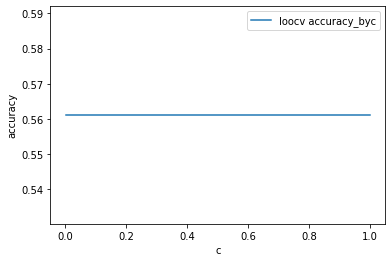

In [12]:
### 문제 3-2 ###
tX = pd.concat([X_train, X_val])
tY = pd.concat([y_train, y_val])
print(tX.shape[0])
loocv = KFold(n_splits=len(tX))
loocv_acc = [[],[],[],[]]
loocv_acc_byC = []
loocv_acc_test = [[],[],[],[],[]]
loocv_acc_test_byC = []

CA = [0.001, 0.01, 0.1, 1]
cnumber = 0
for c in CA:
  for trainIdx, valIdx in loocv.split(tX, tY):
    trainx, valx = tX.iloc[trainIdx], tX.iloc[valIdx]
    trainy, valy = tY.iloc[trainIdx], tY.iloc[valIdx]
    X_train_scaled = scaler.fit_transform(trainx)
    X_val_scaled = scaler.fit_transform(valx)
    X_test_scaled = scaler.fit_transform(X_test)
    modelLSVM = SVC(C= c, kernel = 'linear')
    modelLSVM.fit(X_train_scaled, trainy)
    loocv_acc[cnumber].append(metrics.accuracy_score(valy, modelLSVM.predict(X_val_scaled)))
    loocv_acc_test[cnumber].append(metrics.accuracy_score(y_test, modelLSVM.predict(X_test_scaled)))
  loocv_acc_byC.append(np.mean(loocv_acc[cnumber]))
  loocv_acc_test_byC.append(np.mean(loocv_acc_test[cnumber]))
  cnumber += 1

plt.figure()
plt.plot(CA, loocv_acc_byC, label='loocv accuracy_byc')
plt.xlabel('c')
plt.ylabel('accuracy')
plt.legend()

print("best C number = ", CA[np.argmax(loocv_acc_byC)])
print("test accuracy = ", loocv_acc_test_byC[np.argmax(loocv_acc_byC)])
### 코드 작성 ###

**설명 작성**  
- 최적의 파라미터: c = 0.001
- 설명: 연산이 너무 오래걸려 standardzation을 진행 후 진행하였습니다. c 를 0.001 부터 1 까지 늘려가며 linear SVM을 통해 학습을 진행, train set과 validation set을 통해 구한 model 각각 test set의 accuracy를 진행 하였습니다. 그 후, validation accuracy의 값이 제일 높은 모델에서의 test accuracy 값을 찾아보았을 때 0.880라는 값이 나왔습니다.

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [27]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [28]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [29]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [30]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [31]:
from sklearn.metrics import r2_score

In [93]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """
    return (1-((1-r2(actual, predicted)) * (rowcount-1) / (rowcount - featurecount - 1)))
####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [94]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [95]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [96]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()
            

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ##################
            included.append(new_column) #included에 새로운 feature 추가
            model.fit(X[included], y) # 학습
            predY = model.predict(X[included]) # 예측
            new_scores[new_column] = adjr2(y, predY, len(y), len(included)) # r2 값 new_score dict에 저장장
            included.pop() # 넣었던 거 빼기
        
        
        if(max(new_scores.values()) > best_r2): #넣었던 r2중의 최고 r2가 bestr2보다 크다면
          included.append(max(new_scores, key=new_scores.get)) # 그 feature 넣고
          best_r2 = max(new_scores.values()) # best_r2값 변경
          continue 
        else: # 아니라면
          break # 끝
        ##############################################
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

selected_features: ['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [106]:
### 문제 4-3 ###
y = X['AveBedrms']
y=y.astype('int')
x = X.drop(columns=['AveBedrms'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]
ridgeR2List = []
lassoR2List = []
for a in alpha:
  ridge = Ridge(alpha = a)
  ridge.fit(X_train, y_train)
  ridgeR2List.append(r2_score(y_val, ridge.predict(X_val)))
  lasso = Lasso(alpha = a)
  lasso.fit(X_train, y_train)
  lassoR2List.append(r2_score(y_val, lasso.predict(X_val)))

ridge = Ridge(alpha = alpha[np.argmin(ridgeR2List)])
ridge.fit(pd.concat(X_train, X_val), pd.concat(y_train, y_val))
print(ridge.)
lasso = Lasso(alpha = alpha[np.argmin(lassoR2List)])
lasso.fit((pd.concat(X_train, X_val), pd.concat(y_train, y_val))



### 코드 작성 ###

0.46967790093326944


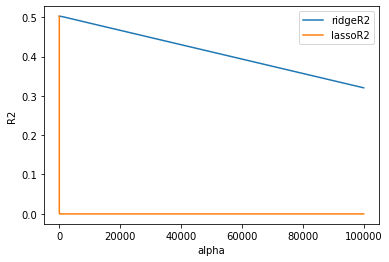

In [92]:
### 문제 4-3 ###
plt.figure()
plt.plot(alpha, ridgeR2List, label='ridgeR2')
plt.plot(alpha, lassoR2List, label='lassoR2')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend()
### 그래프 작성 ###

- Rridge regression 모델 최적의 alpha 값:
- Lasso regression 모델 최적의 alpha 값:

In [25]:
# 최종 결과 출력